In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=40)

In [6]:
print(iris.feature_names[:2])
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


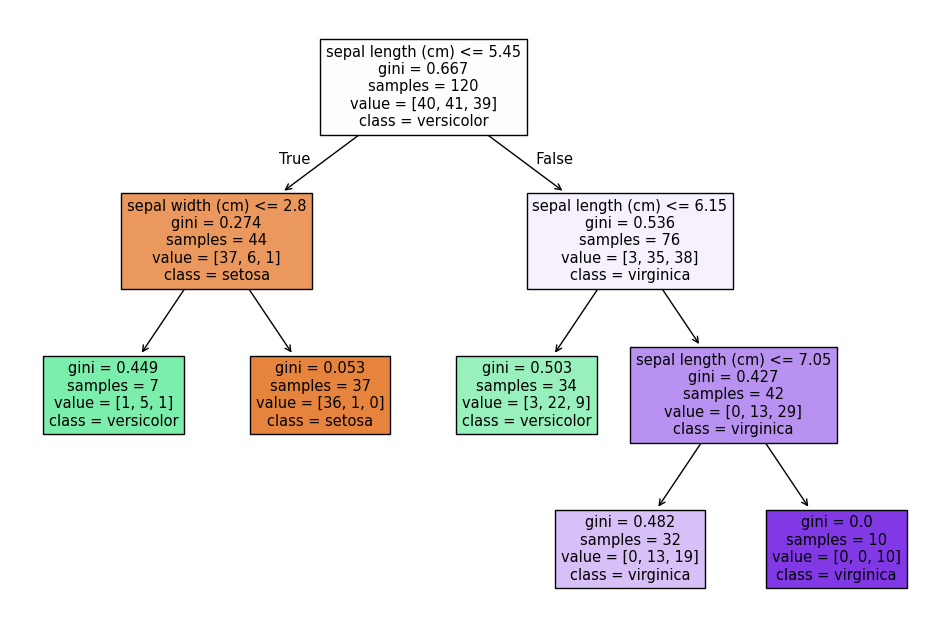

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
# filled - True , fill the colors.
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.8


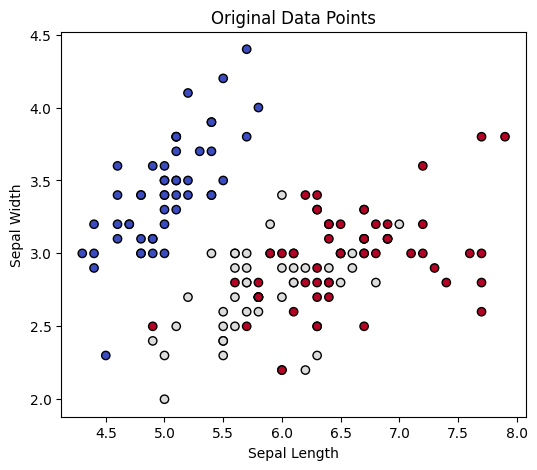

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Original Data Points")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


(np.float64(3.3), np.float64(8.9)) (np.float64(1.0), np.float64(5.4))


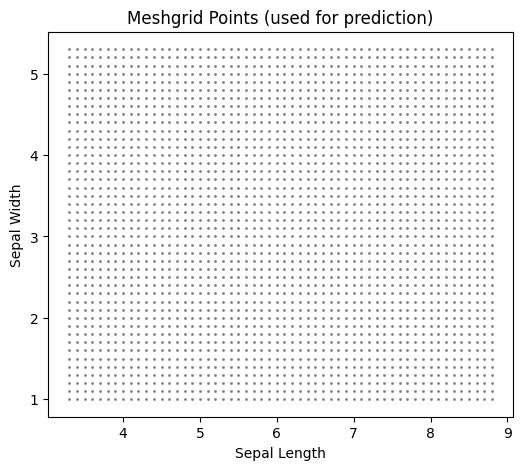

In [11]:
import numpy as np

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


# Example
# x_min, x_max = 1, 4
# y_min, y_max = 10, 13
# np.arange(x_min, x_max, 1) → [1, 2, 3]
# np.arange(y_min, y_max, 1) → [10, 11, 12]
# xx, yy = np.meshgrid([1, 2, 3], [10, 11, 12])
# xx : [[1 2 3]
#       [1 2 3]
#       [1 2 3]]
# yy : [[10 10 10]
#       [11 11 11]
#       [12 12 12]]
# (xx[0,0], yy[0,0]) = (1, 10)
# (xx[0,1], yy[0,1]) = (2, 10)
# (xx[0,2], yy[0,2]) = (3, 10)
# (xx[1,0], yy[1,0]) = (1, 11)
# ...
# (xx[2,2], yy[2,2]) = (3, 12)




print((x_min , x_max)  , (y_min , y_max))

plt.figure(figsize=(6, 5))
plt.scatter(xx, yy, s=1, color='gray')
plt.title("Meshgrid Points (used for prediction)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


(44, 56) (44, 56) (2464,)


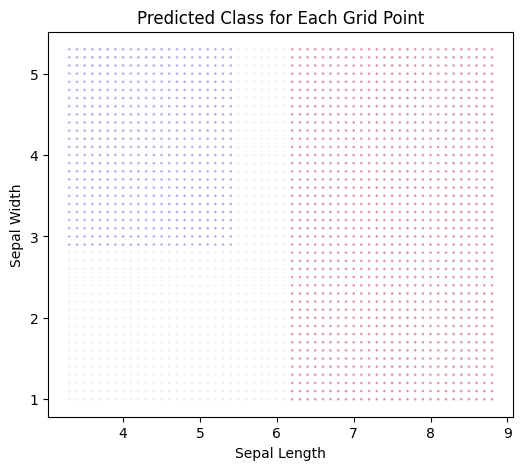

In [12]:
# .ravel() convert it into 1d array
# np.c_[[1,2,3], [4,5,6]]
# [[1, 4],
#  [2, 5],
#  [3, 6]]

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid_points)

print(xx.shape , yy.shape,Z.shape)

plt.figure(figsize=(6, 5))
plt.scatter(xx.ravel(), yy.ravel(), c=Z, alpha=0.3, cmap=plt.cm.coolwarm, s=1)
plt.title("Predicted Class for Each Grid Point")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


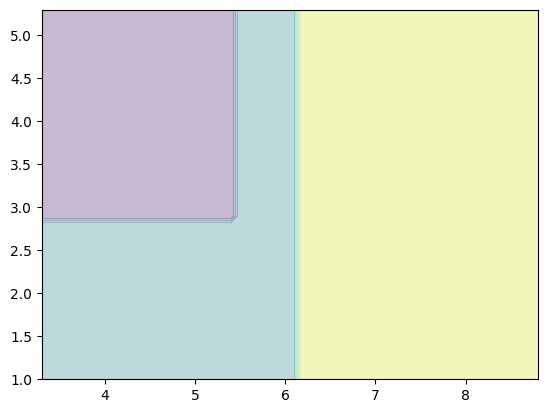

In [13]:
# Example
# xx.shape = (3, 4)
# xx.ravel()
# [xx[0,0], xx[0,1], xx[0,2], xx[0,3],
#  xx[1,0], xx[1,1], xx[1,2], xx[1,3],
#  xx[2,0], xx[2,1], xx[2,2], xx[2,3]]
# Z = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
# Z.reshape((3, 4)) =>
# [[0, 0, 1, 1],
#  [0, 0, 1, 1],
#  [0, 0, 1, 1]]


Z = Z.reshape(xx.shape)
print(Z[:])
plt.contourf(xx, yy, Z, alpha=0.3)

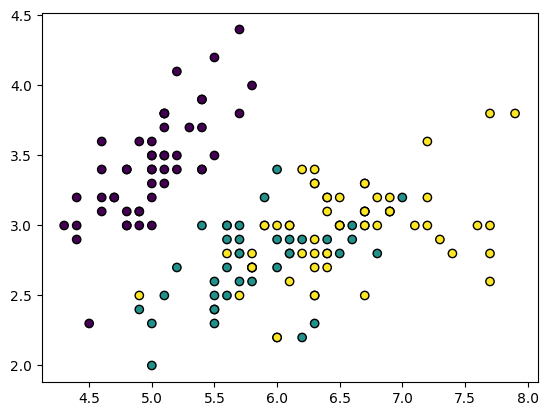

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

**Decision Boundary**


/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1197/643627671.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.coolwarm(label / max(y)), label=f"Class {label}")


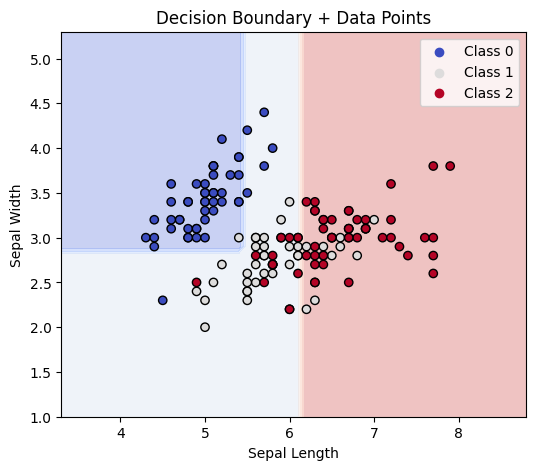

In [15]:
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
for label in np.unique(y):
    plt.scatter([], [], c=plt.cm.coolwarm(label / max(y)), label=f"Class {label}")
plt.legend()
plt.title("Decision Boundary + Data Points")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


In [16]:
print(clf.criterion)


gini


In [17]:
from sklearn.tree import export_text
textual_representation_decision_tree = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(textual_representation_decision_tree)


|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2



In [18]:
print(clf.feature_importances_)

[0.83569313 0.16430687]


- Feature Importance f =  Total Impurity Decrease / ∑ all features (Total Impurity Decrease for feature f)
	
- It’s an array of values, one for each feature.

- Each value represents the relative contribution of that feature to reducing impurity (how well it helps split the data).
 
- The values sum up to 1.

- Example 
   
   - [0.75, 0.25]
   
   - Feature 0 (e.g., sepal_length) contributed 75% to the tree decisions.
   
   - Feature 1 (e.g., sepal_width) contributed 25%.

In [19]:
print(clf.tree_.node_count)       # Number of nodes
print(clf.tree_.max_depth)        # Depth of the tree
print(clf.tree_.feature)          # Feature used at each node (index)
print(clf.tree_.threshold)        # Threshold value at each split

# -2 : leaf node

9
3
[ 0  1 -2 -2  0 -2  0 -2 -2]
[ 5.45000005  2.80000007 -2.         -2.          6.14999986 -2.
  7.04999995 -2.         -2.        ]


# Overfitting Analysis

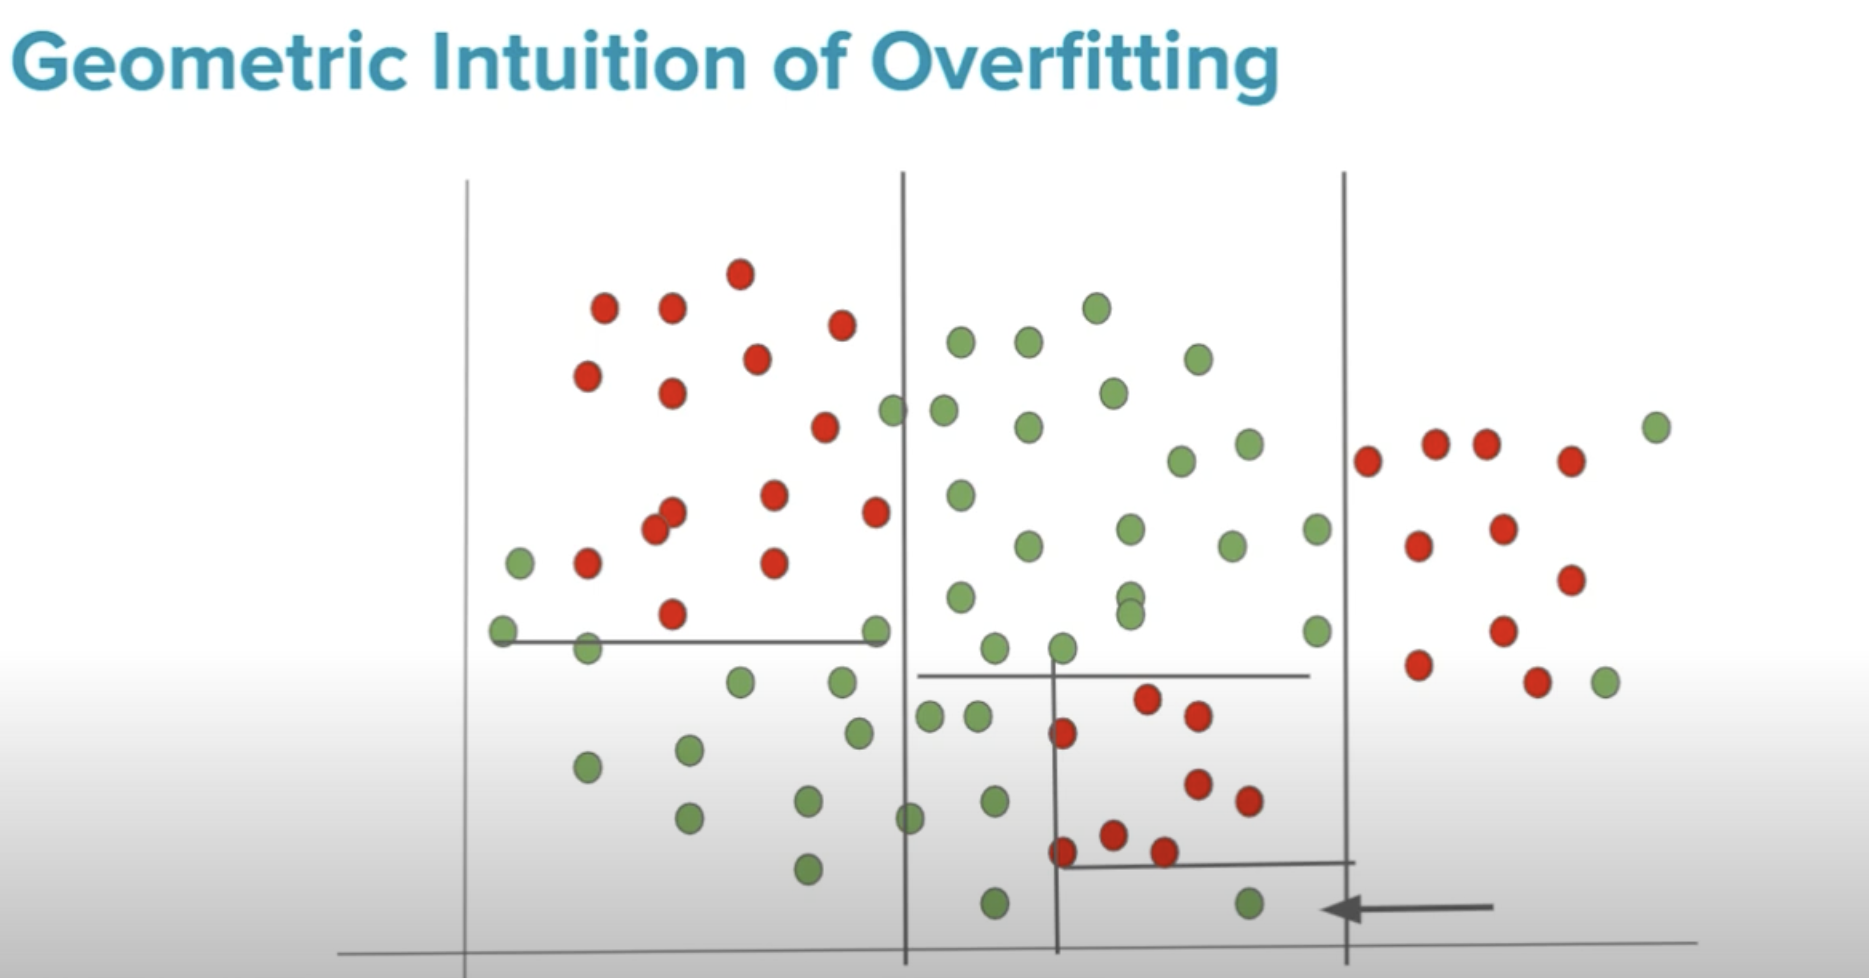

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

In [21]:
data=pd.read_csv('/Users/akashjain/Desktop/Machine Learning/Utils/Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
def analyzer(max_depth,data) :

    X=data.iloc[:, 2:4].values
    y=data.iloc[:, -1]. values

    clf=DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)

    a=np.arange(start = X[:,0].min()-1, stop= X[:,0].max()+1, step=0.1)
    b=np.arange(start = X[:,1].min()-1, stop= X[:,1].max()+1,step=100)

    XX, YY = np.meshgrid (a, b)

    input_array=np.c_[XX.ravel(), YY.ravel()]
    labels=clf.predict(input_array)

    plt.contourf(XX,YY, labels.reshape(XX.shape),alpha=0.5)
    plt.scatter (X[:, 0], X[:,1], c=y)

    

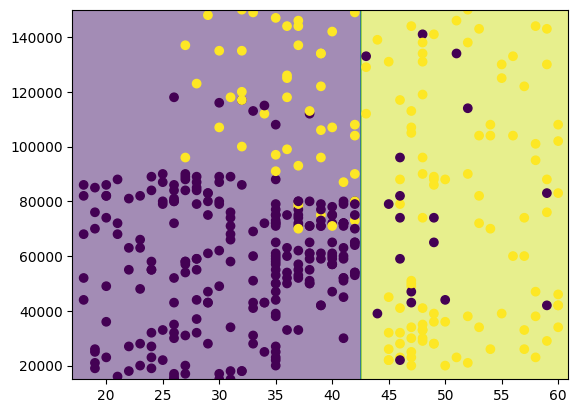

In [23]:
analyzer(1,data)


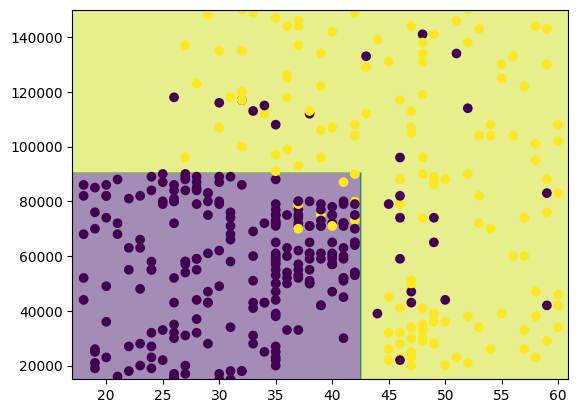

In [24]:
analyzer(3,data)

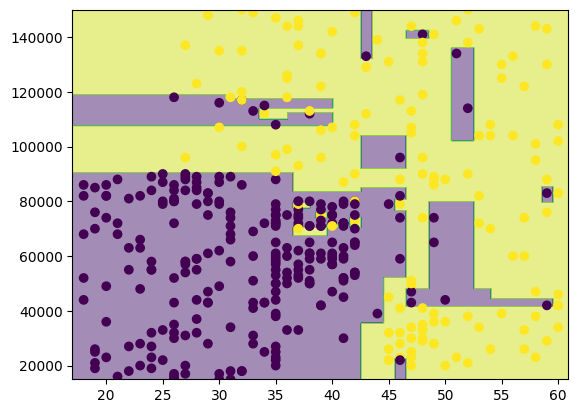

In [25]:
analyzer(None,data)

# HyperParameter Tuning 

**Decision Tree Parameters**

- Criterian (gini or entropy)

- Splitter (eg : random prevents overfit)

- Max Depth (By deafult : none i.e let decision tree grow in that case overfiting , if 1 then underfiting)

- Min samples split (Split when there is that no of rows left)

- Min Samples leaf (Minimum no of samples in leaf)

- Max Features

- Min Impurity Decrease

- Max Leaf Nodes

In [26]:
import numpy as np
import pandas as pd


In [27]:

data=pd.read_csv('/Users/akashjain/Desktop/Machine Learning/Utils/Datasets/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
data['Gender'].replace({ 'Male' :0,'Female':1}, inplace=True)

/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1197/3483285781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({ 'Male' :0,'Female':1}, inplace=True)
/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1197/3483285781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [29]:
X = data.iloc[:,1:4].values
y = data.iloc[:,-1].values

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=scaler.fit_transform(X)


In [31]:
print(X.shape,y.shape)


(400, 3) (400,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1) 

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [34]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score 
accuracy_score (y_test, y_pred)

0.7875

**using GridSearchCV**

Not only works for Decision tree can be work for SVM  Logistic regression etc.

In [40]:
params = {
    "criterion" : ["gini" , "entropy"],
    "max_depth" : [1,2,3,4,5,6,7,None]
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf , param_grid=params , cv = 10 , n_jobs=-1)
# cv : cross validation (K-fold cross validate) , means training on k-1 and validate on 1.
# n_jobs=-1 , i want all my processor to do the work

In [42]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [43]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [44]:
grid.best_score_

np.float64(0.91875)

In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}